# Matemathics in Machine Learning 
# Adult Income Dataset
## Fabio Tatti - s282383
The Adult Income Dataset was created by the US Census Bureau in order to predict if the income of a given person is above or under 50 thousand dollars per year given some features, which is called a binary classification task. The dataset has 48842 instances, with 6 continuous, 8 nominal attributes. In our case we will proceed by first describing the dataset itself, then we will explore the data in order to understand better how to properly use it. We will clean the data and then prepare it before testing various models given the chosen metrics.
The dataset is available to the public at the link: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
and also:
https://archive.ics.uci.edu/ml/datasets/Adult/ .

In [31]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp
from sklearn.model_selection import train_test_split
import dataframe_image as dfi
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import category_encoders as ce


## Import the dataset
We import the dataset as a Pandas dataframe

In [32]:
data = pd.read_csv("adult_kaggle.csv")
data.head()
dfi.export(data, "table.png", max_rows = 7)

## 1 - Data Exploration and Cleaning
We first investigate the nature of the dataset by checking the shape

In [33]:
#first we print the shape of the original dataset
print(f"The original shape of the dataset is {data.shape}")
#then we proceed by removing the null values and the ? char
data.head()

The original shape of the dataset is (48842, 15)


age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

### Null Values
We are going to fix the **null values** that inside the dataset are the ones with *?* value. We fix by substituting with the most frequent value. We first check which colums do have the *?* value inside.

In [34]:
print("Performing data cleaning by removing the ? char by the columns")
for d in data.columns:
    feature, count = np.unique(data[d], return_counts = True)
    if "?" in feature:
        print(d)
        most_freq_feat = feature[np.argmax(count, axis = 0)]
        data[d][data[d] == "?"] = most_freq_feat
        
data.head()

Performing data cleaning by removing the ? char by the columns
workclass
occupation


<ipython-input-34-4c9b48dc445a>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in feature:
<ipython-input-34-4c9b48dc445a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[d][data[d] == "?"] = most_freq_feat


native-country


age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18    Private  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4     Prof-specialty    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

As we can see the three classes that where subject to the missing values problems where *workclass*, *occupation* and *native-country*.  

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Now we can proceed to map the income entry in such a way that is a binary variable

### Balance of classes
Now we do print some statistics on the data, we first plot the distribution inside the *income* class

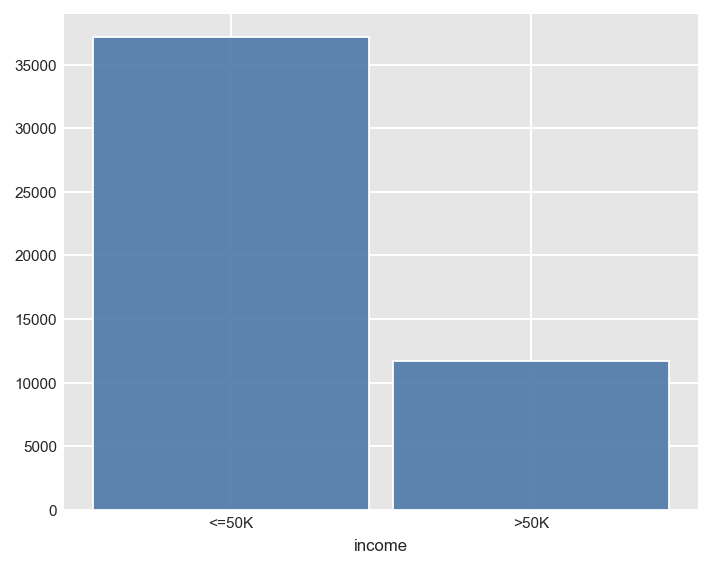

In [36]:
sns.set(font_scale=0.7)
fig = dxp.count("income", data = data, figsize =(5,4))
fig.savefig("Income balance")
fig

From this plot we can understand that the dataset has a problem of **unbalancement**, since the number of occourrences of the two different labels are really different in terms of magnitude.  We can also now investigate the distribution of the salary over the man/woman one.

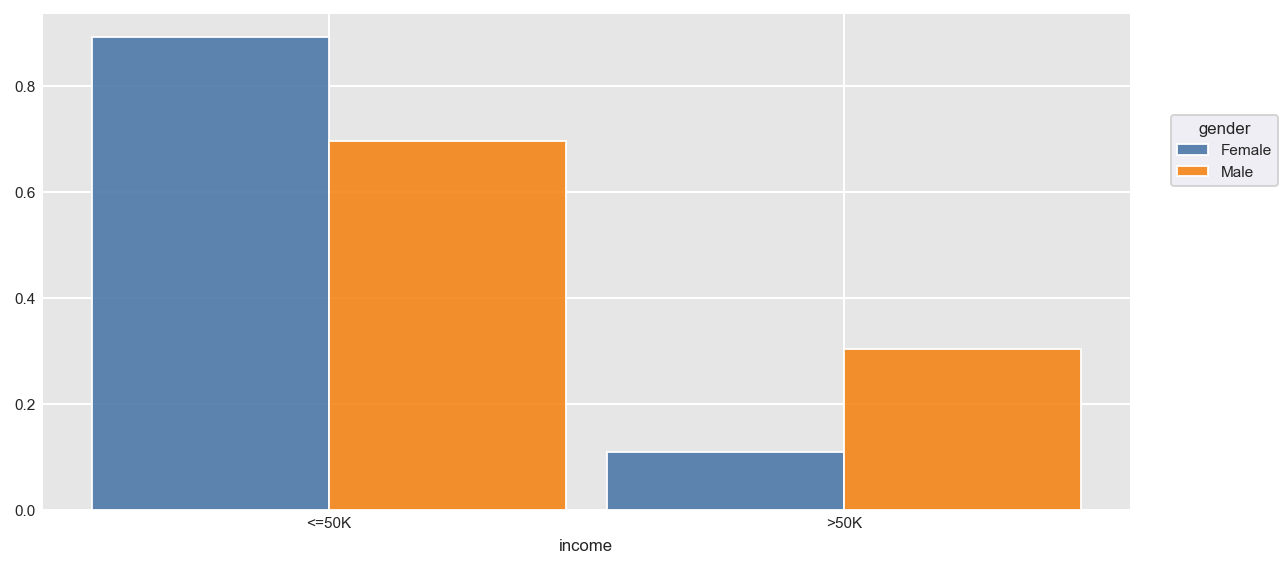

In [37]:
fig = dxp.count('income', data=data, split='gender', figsize =(8,4), normalize = "gender")
fig.savefig("Income gender balance")
fig

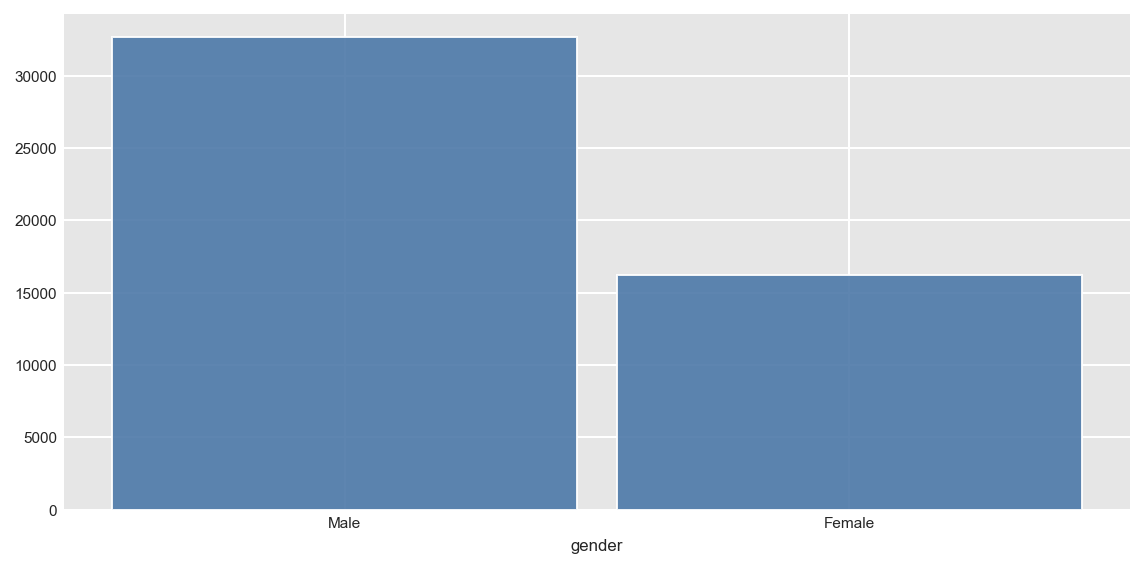

In [38]:
fig = dxp.count("gender", data = data, figsize =(8,4))
fig.savefig("Balance gender")
fig

As we can notice the number of women is way smaller when we look for high salary. Despite that we can notice that in the overall dataset the number of the women compose a minor percetage of the whole people taken into account for the Census. We can do the same thing but taking into account the etnic heritage of the people.

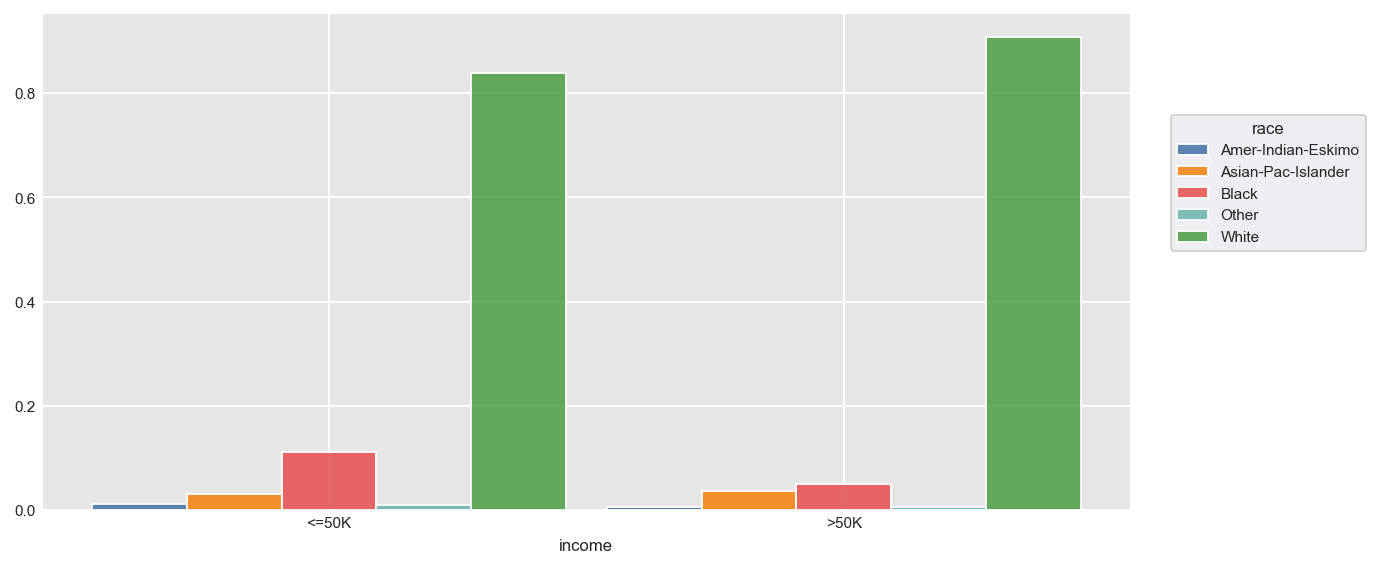

In [39]:
fig = dxp.count("income", data = data, split = "race", normalize = "income", figsize =(8,4), x_order = "asc")
fig.savefig("Balance income race")
fig

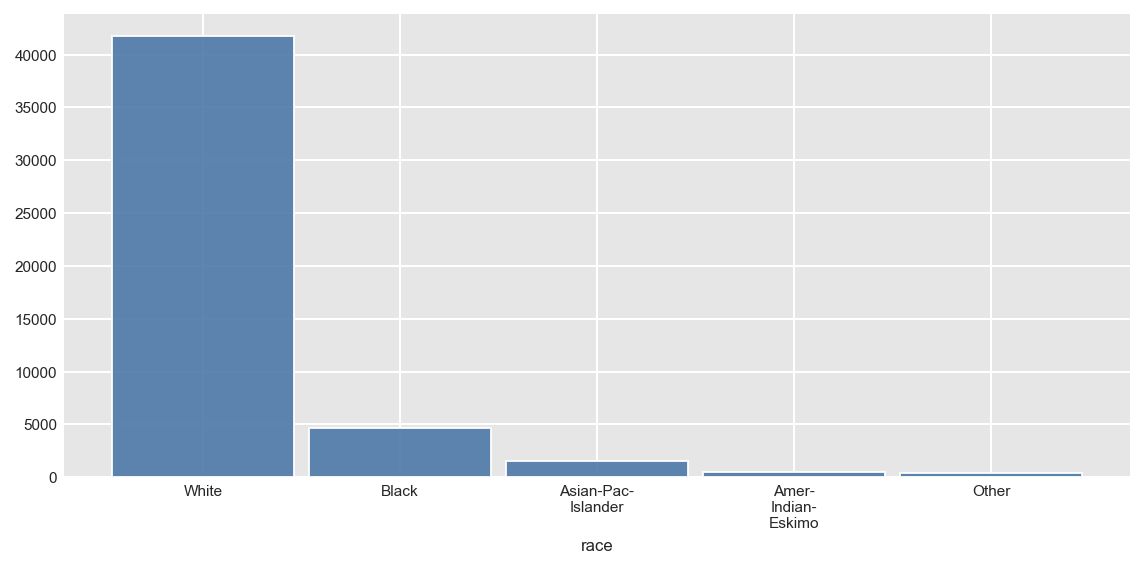

In [40]:
fig = dxp.count("race", data = data, figsize =(8,4))
fig.savefig("Balance race")
fig

As we can notice the data seems to be unbalanced in the race feature, since the most of the data are composed by White people. 

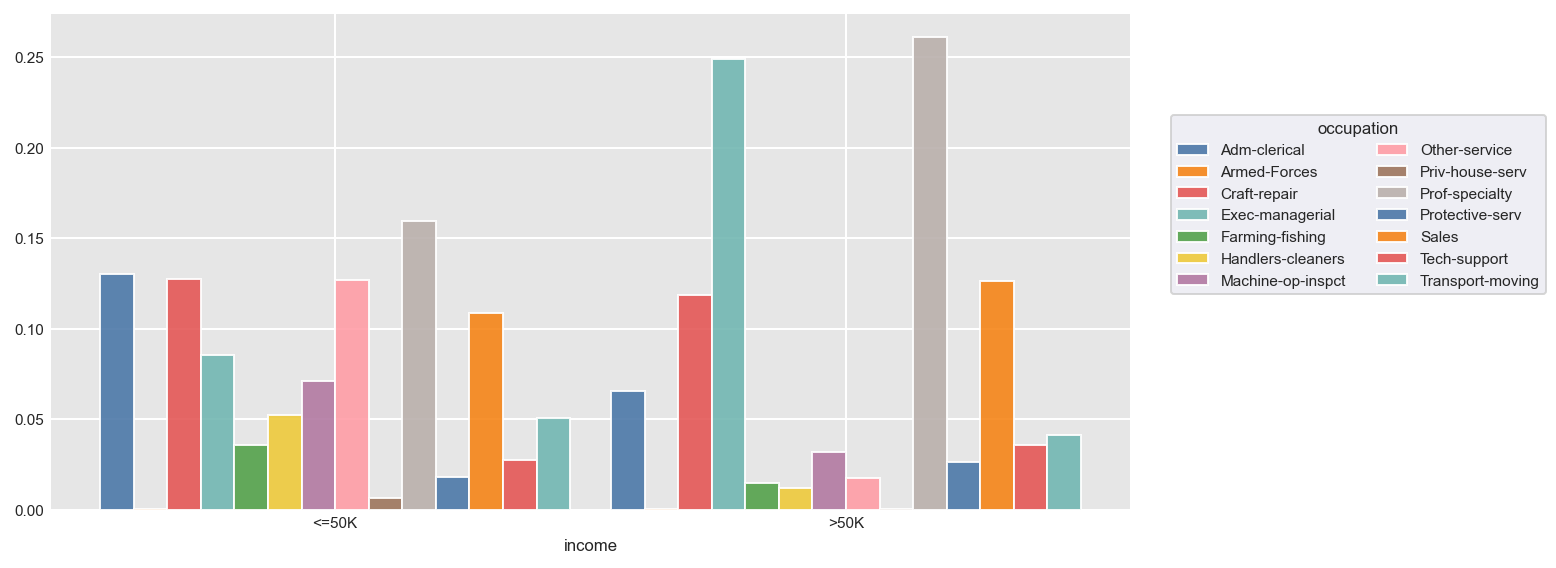

In [41]:
fig = dxp.count("income",split = "occupation",  data = data, figsize =(8,4), normalize = "income")
fig.savefig("Balance income occupation")
fig

We explore the relationship with the education 

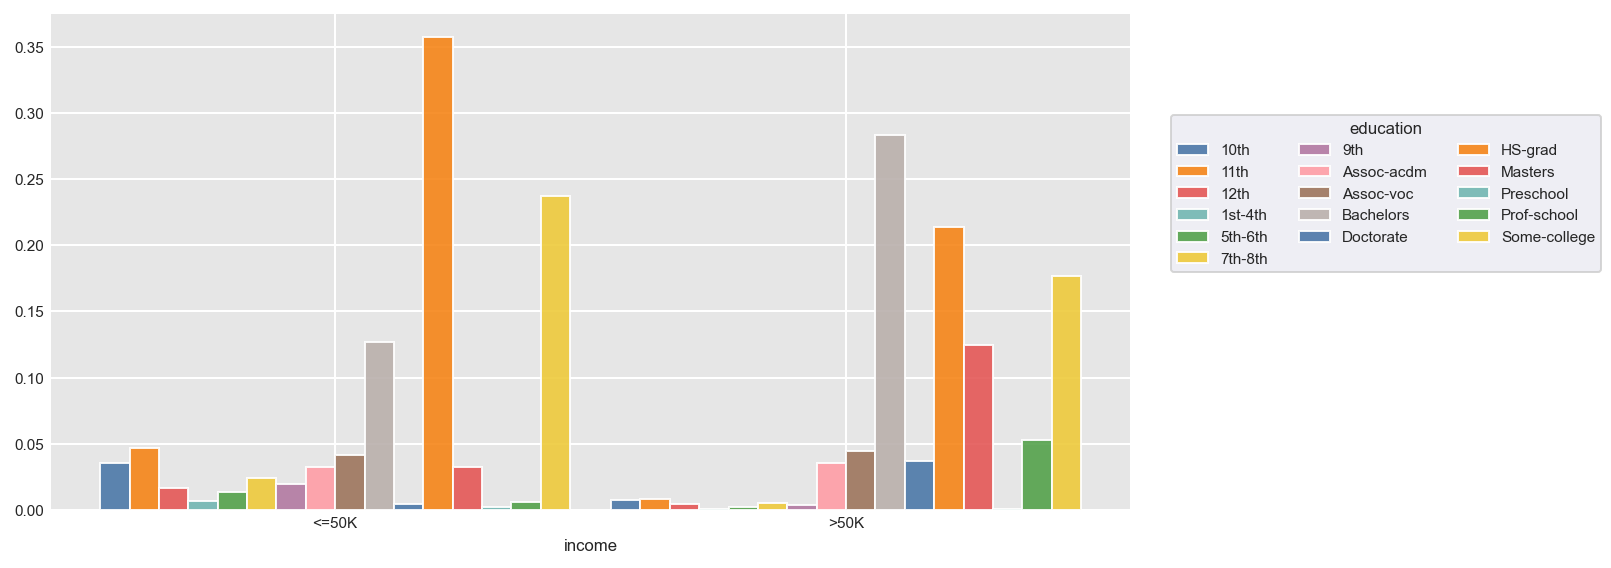

In [42]:
fig = dxp.count("income",split = "education",  data = data, figsize =(8,4), normalize = "income")
fig.savefig("Balance education income")
fig

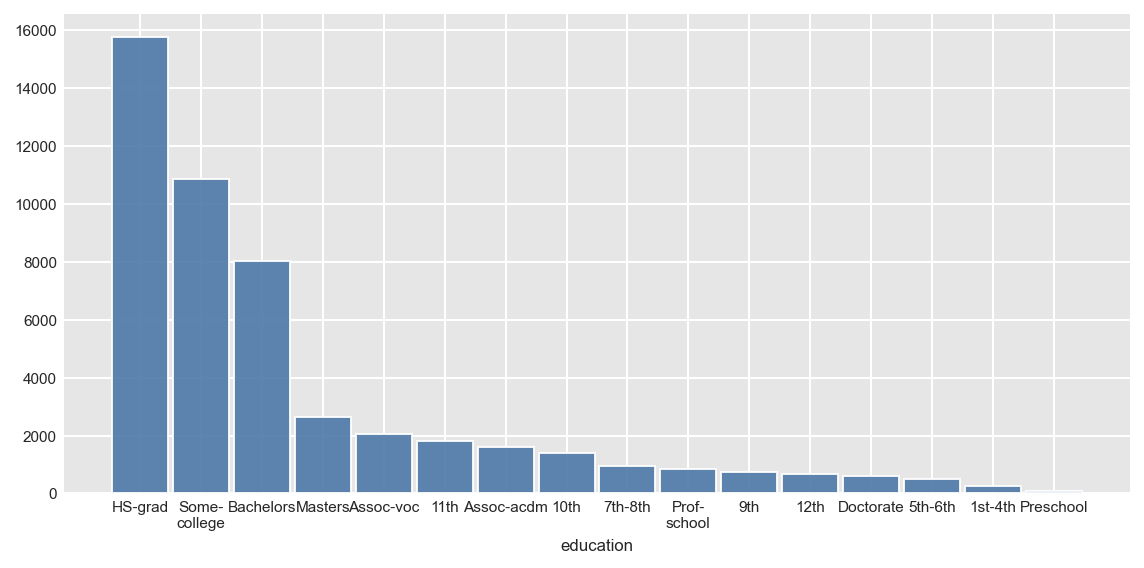

In [43]:
fig = dxp.count("education", data = data, figsize = (8,4))
fig.savefig("Balance education")
fig

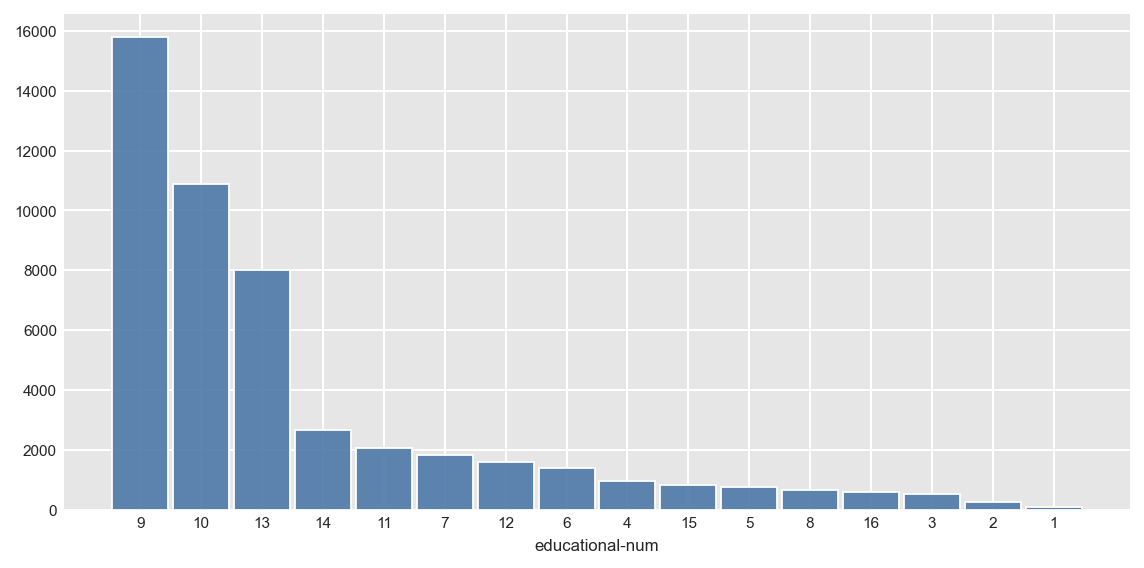

In [44]:
fig = dxp.count("educational-num", data = data, figsize = (8,4))
fig.savefig("Balance educationalnum")
fig

We can see that the feature "education" and "education-num" do have a similar behaviour. We will investigate their correlation. We also explore the original country of the different people in order to check if there is any correlation among that and the average salary.

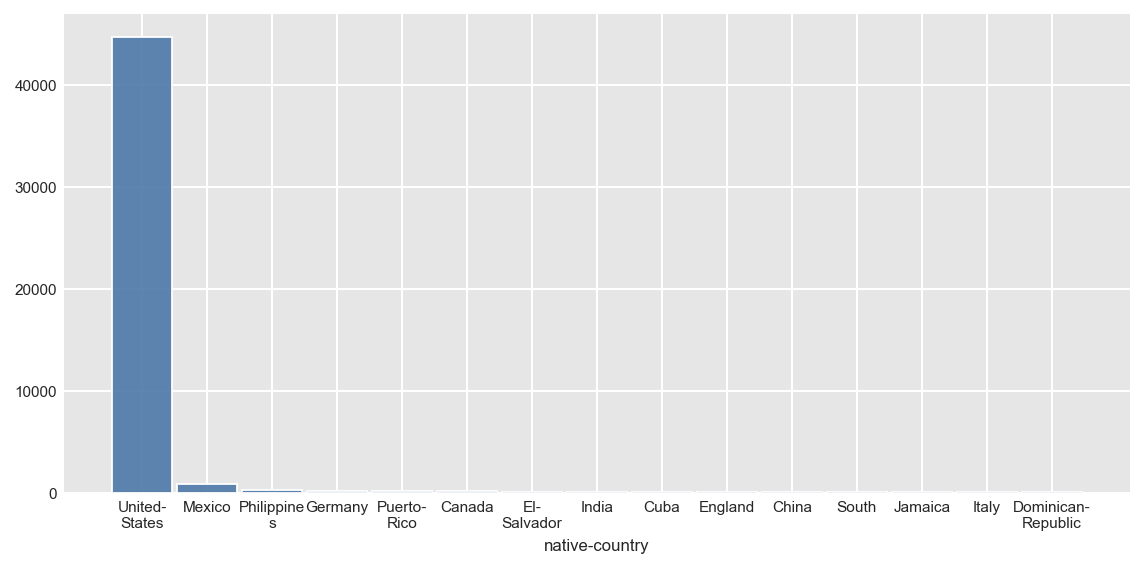

In [45]:
fig = dxp.count("native-country",data = data,figsize = (8,4), x_order = "top 15" )
fig.savefig("Balance country top")
fig

As we can notice the most of the population comes from the US and secondly from Mexico. Since this is a categorical variable and the most of the other values have a small occurency we will group them together under the new value "Not-US-MX".

In [46]:
unique_values_nation = list(data["native-country"].unique())
unique_values_nation.remove("United-States")
unique_values_nation.remove("Mexico")
data_2 = data.copy()
for i in unique_values_nation:
    data_2["native-country"] = data_2["native-country"].replace(to_replace = i, value = "Not-US-MX")
fig = dxp.count("native-country",data = data_2,figsize = (8,4) )
fig.savefig("Balance country")

We can investigate how the hours of work per week influence the incoming salary.

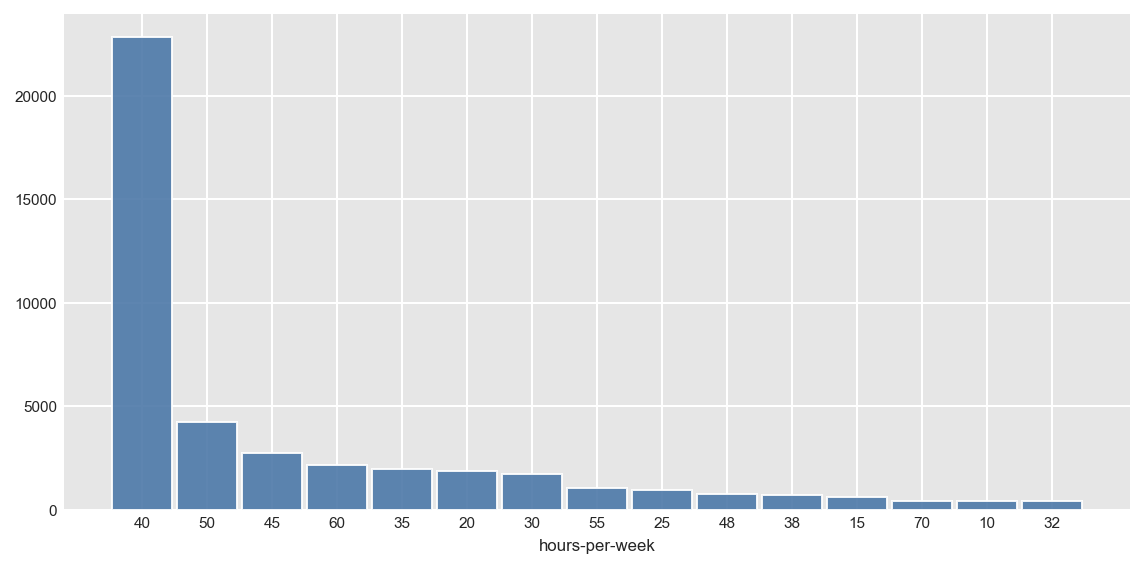

In [47]:
fig = dxp.count("hours-per-week",data = data,figsize = (8,4), x_order = "top 15" )
fig.savefig("Balance hours week")
fig

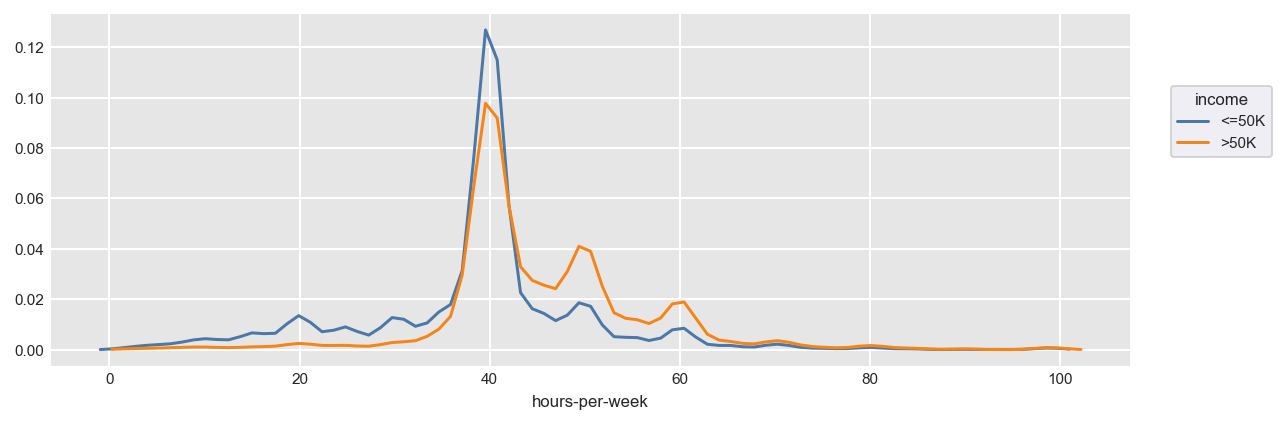

In [48]:
fig = dxp.kde(x='hours-per-week', data=data, figsize = (8,3), split = "income")
fig.savefig("Balance hours week income")
fig

We can see that the most of the people that earns more than 50K per year usually works more than the ones that earn less. We now explore the marital status.

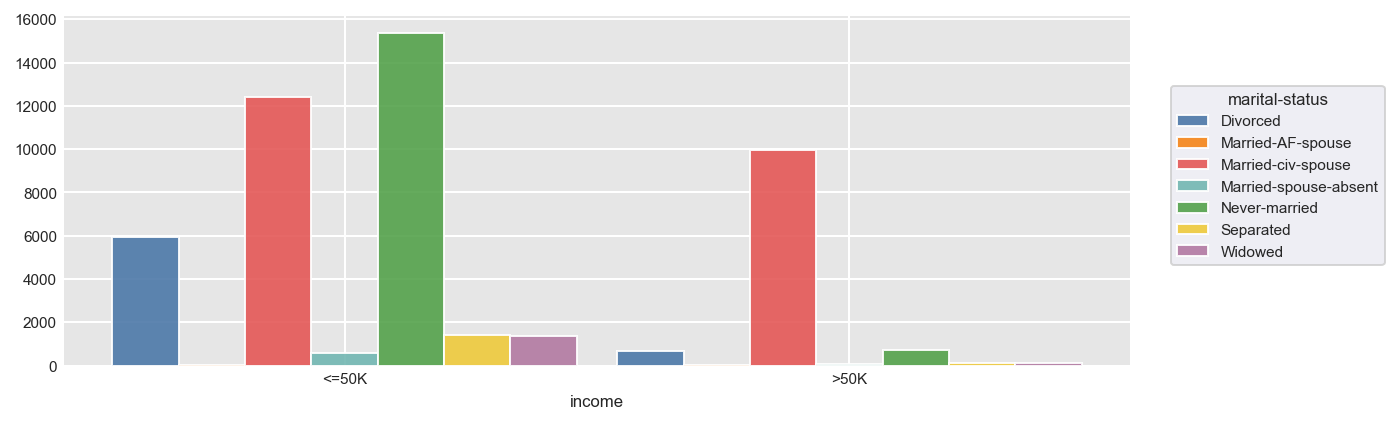

In [49]:
fig = dxp.count('income', data=data, figsize = (8,3), split = "marital-status")
fig.savefig("Balance income marital stat")
fig

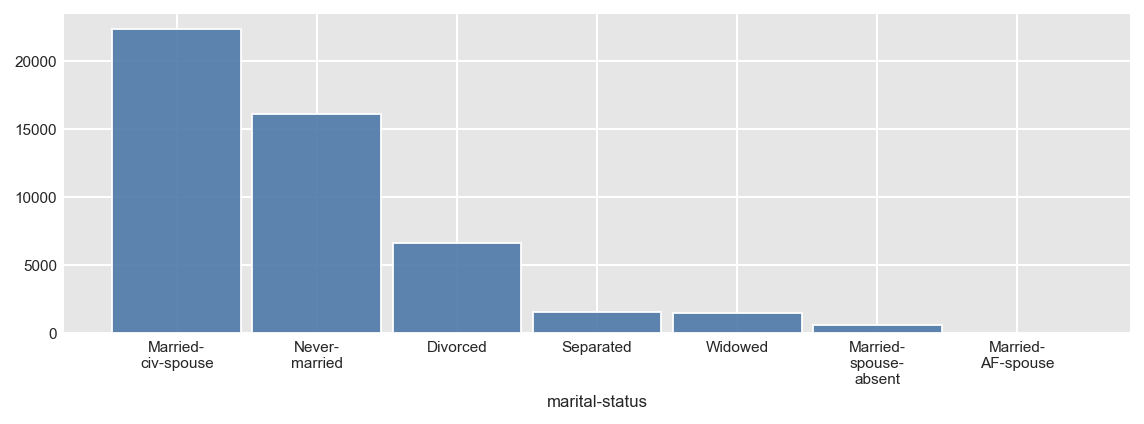

In [50]:
fig = dxp.count('marital-status', data=data, figsize = (8,3))
fig.savefig("Balance marital stat")
fig

Seems that married people are the majory of the sample, but also that it is related with a salary above 50K. Now we check workclass.

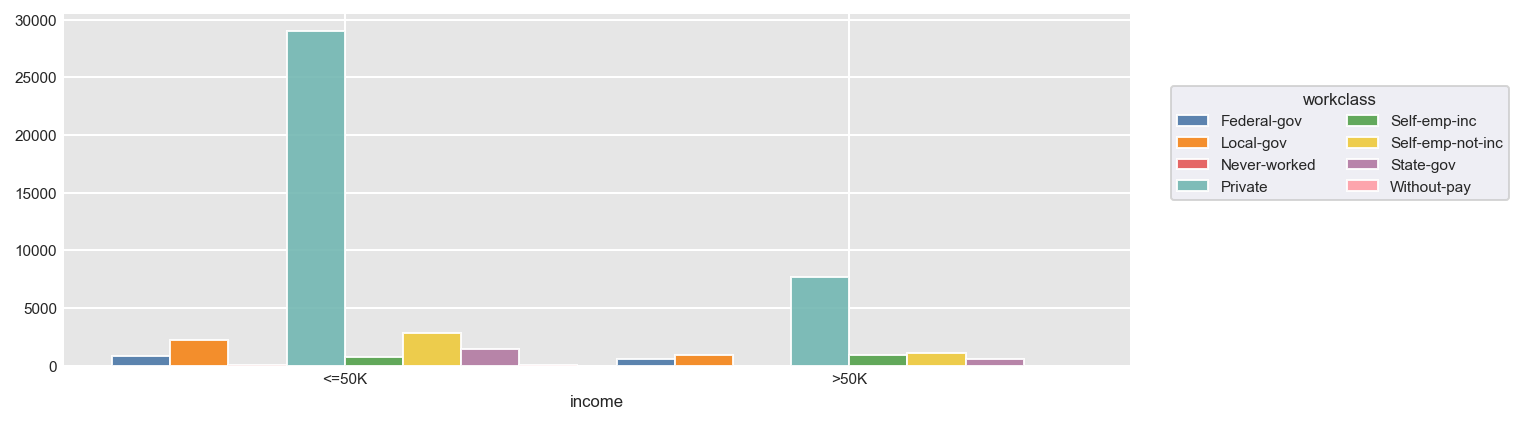

In [51]:
fig = dxp.count('income', data=data, figsize = (8,3), split = "workclass")
fig.savefig("Balance income workclass")
fig

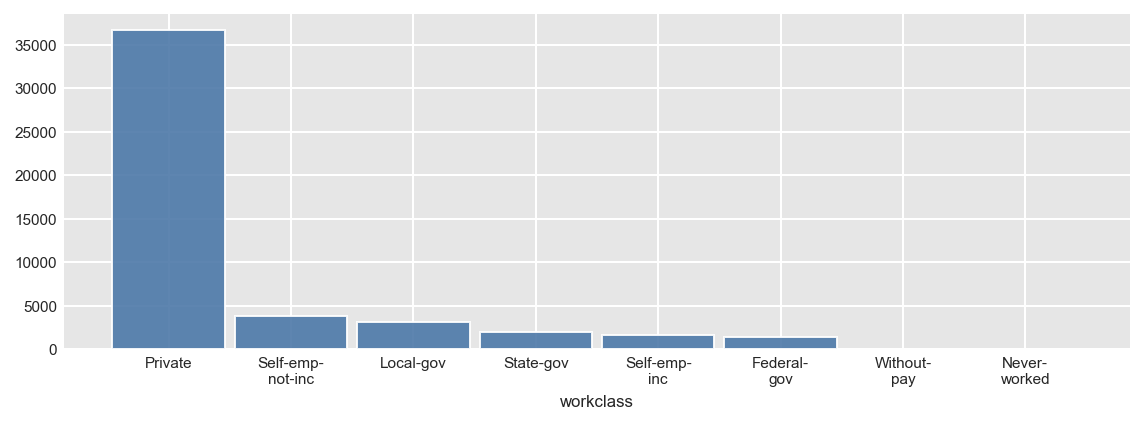

In [52]:
fig = dxp.count('workclass', data=data, figsize = (8,3))
fig.savefig("Balance workclass")
fig

Also in this case we can notice that the majory of the sample is in the work class Private, which by the way is the major one both in case of a salary above 50K or under. We now investigate the age.

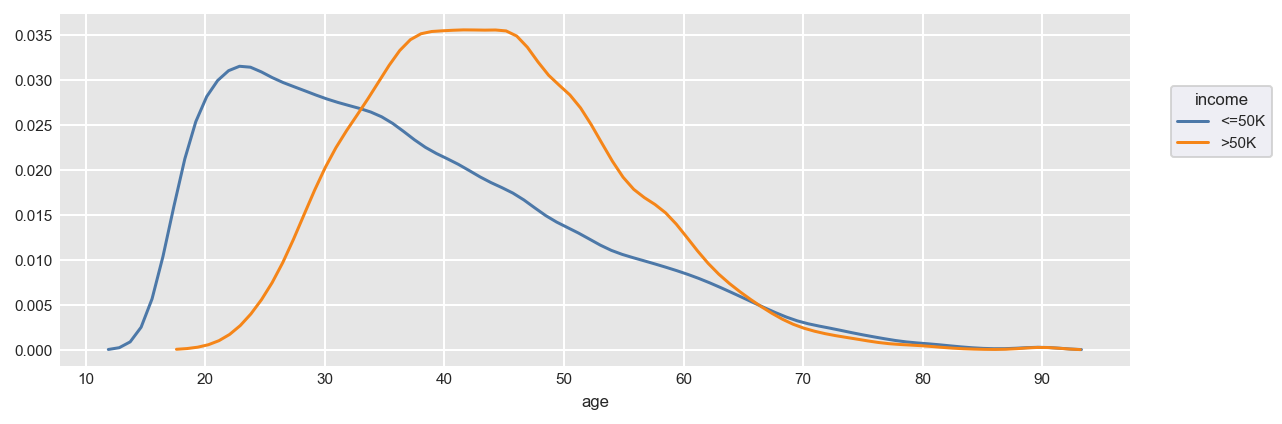

In [53]:
fig = dxp.kde(x='age', data=data, figsize = (8,3), split = "income")
fig.savefig("Balance age income")
fig

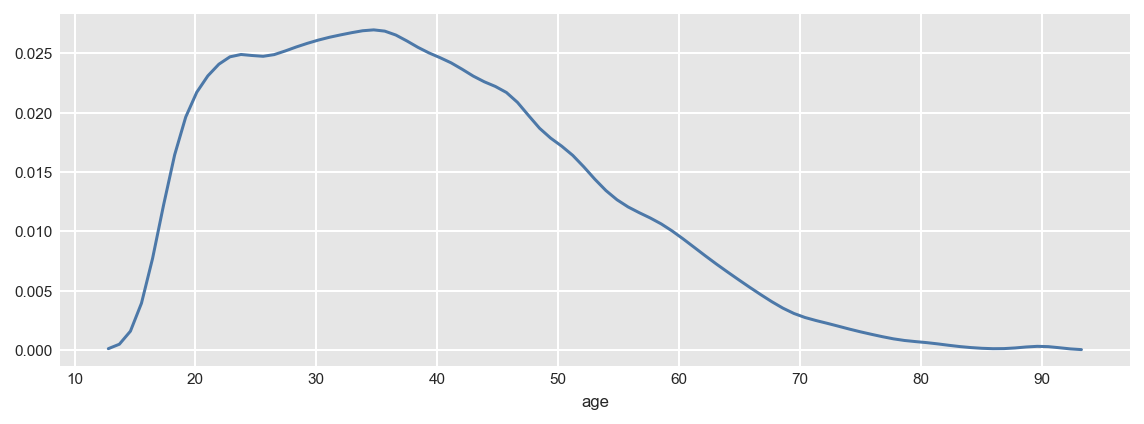

In [54]:
fig = dxp.kde(x='age', data=data, figsize = (8,3))
fig.savefig("Balance age ")
fig

As we can image the peak of the curve with highest salary is in the range about 40-50 years old, while the peak for the lowest salary is in a younger age, which corresponds usually to a carreer still in the start phase. The overall distribution of the different ages seems to be representative more for those age categories more present in the work market: in fact we can notice that for older ages we have a huge drop of the curve. We can explore also the age + working hours on average.

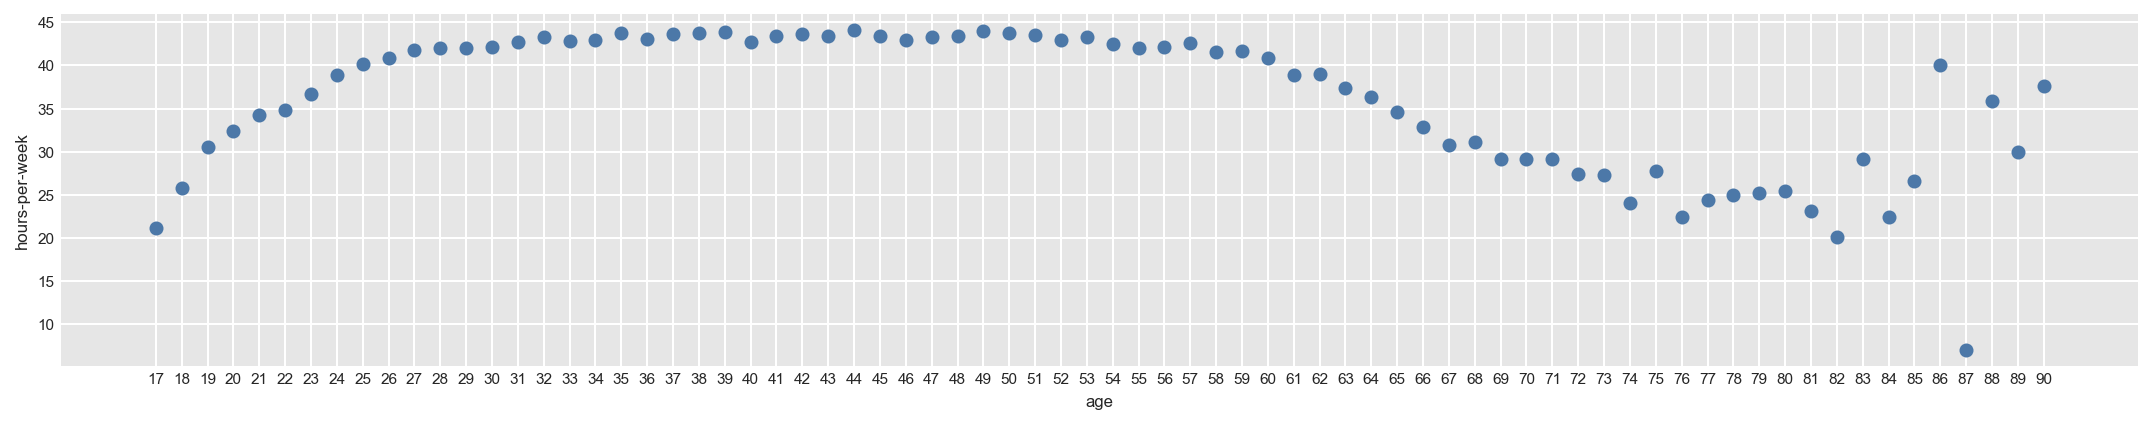

In [55]:
fig = dxp.scatter(x='age', y='hours-per-week', data=data, aggfunc='mean', figsize = (15,3))
fig.savefig("Balance age hours")
fig

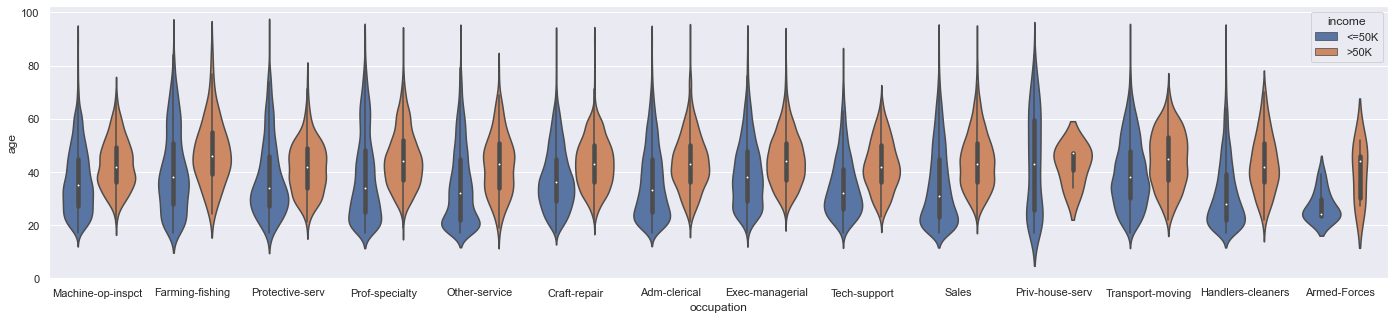

In [56]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize = (24,5))
ax = sns.violinplot(x = "occupation", y ="age", hue ="income", data = data)
plt.savefig("Occupation age income")

As we could imagine the younger the worker the lower income he will have. This seems to be valid for the most of the works. We repeat the same with the race.

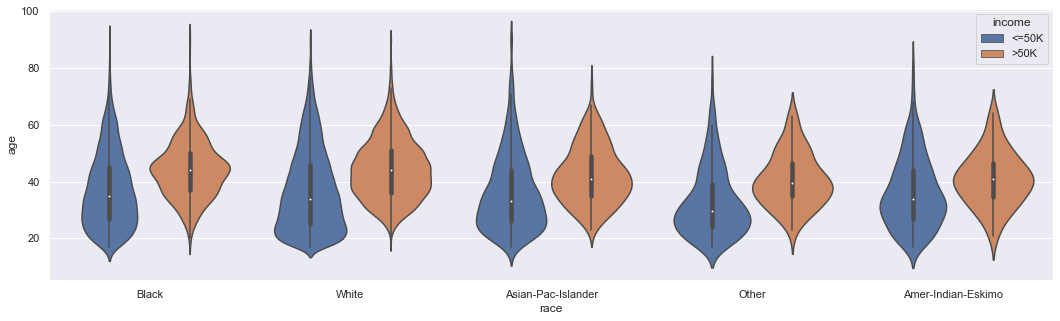

In [29]:
fig, ax = plt.subplots(figsize = (18,5))
ax = sns.violinplot(x = "race", y ="age", hue ="income", data = data)
plt.savefig("Violin Race Age Income")

## Data Preparation
We prepare the data in order to feed the Machine Learning models.
### Correlation

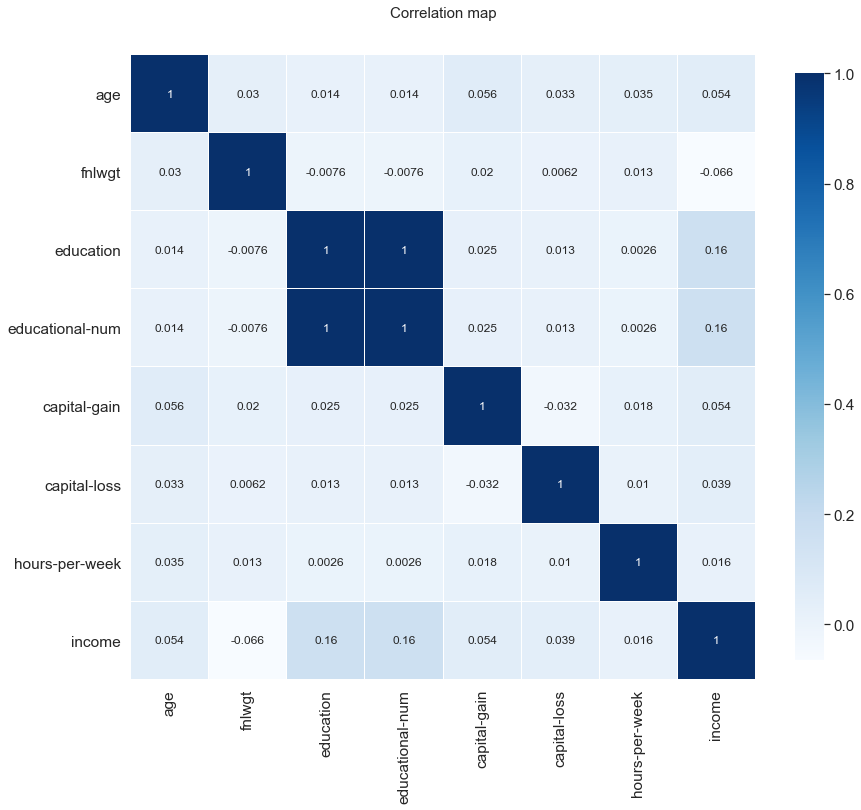

In [87]:
sns.set(font_scale=1.4)
plot, ax = plt.subplots(figsize = (14,12))
plt.title("Correlation map", y = 1.05, size = 15)
categorical_columns = list(data.select_dtypes(include=['object']).columns)
categorical_columns.remove("education")
categorical_columns.remove("income")
data_corr = data.drop(categorical_columns, axis = 1)

_ = sns.heatmap(
        data_corr.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), 
        cmap = "Blues",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
plt.savefig("Correlation map")

We removed all the categorical variables, except for "education" which was encoded numerically by means of the factorization in order to check the relationship with "educational-num". This was possible since, respect to the other categorical variables, there is an implicit order in the concept of education, which allows us to switch to numerical values to then compute the correlation. As we can see the correlation among those is 1 as expected, since they express the same feature, one numerically and one categorically. Since that, we do remove the categorical one.

In [29]:
data = data.drop(["education"], axis=1)

### Hash Encoding
We now encode the categorical features with the Hash Encoding Encoding, since the Label Encoder can only be used on the target variable "income".

In [32]:
categorical_features = categorical_columns.copy()
categorical_features.remove("income")
hash_encoder=ce.HashingEncoder(cols=categorical_features, n_components=32)
data_no_categorical = data.drop(categorical_columns, axis = 1)
categorical_econded_hash = hash_encoder.fit_transform(data[categorical_features])
encoded_data_hash = pd.concat([data_no_categorical, categorical_econded_hash], axis = 1)
encoded_data_hash.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   col_0  col_1  col_2  col_3  ...  col_22  col_23  col_24  col_25  col_26  \
0      0      2      0      0  ...       0       0       0       0       0   
1      0      0      0      0  ...       0       0       0       0       0   
2      0      0      0      0  ...       0       0       0       0       0   
3      0      0      0      0  ...       0       0       0       0       0   
4      1      2      0      0  ...       0       1       0       0       0   

   col_27  col_28  col_29  col_30  col_31  
0       0       1       1       1       0  
1       0       0       1       0       0  
2       0       0       2       0       0  
3       0       1       1       1       0  
4       0       0       0       0       0  

[5 rows x 38 columns]

### Data Standardization
We now proceed with the standardization of the dataset, firstly separating the target feature from the rest of the data.

In [57]:
#now we can proceed with the train-test split
data["income"] = data["income"].replace(to_replace = "<=50K", value = 0)
data["income"] = data["income"].replace(to_replace = ">50K", value = 1)
y = data["income"]
X = encoded_data_hash

#scaling
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


array([[-0.99512893,  0.35167453, -1.19725891, ...,  0.26305181,
         2.31148147, -0.36160855],
       [-0.04694151, -0.94552415, -0.41933527, ...,  0.26305181,
        -0.37828047, -0.36160855],
       [-0.77631645,  1.3947231 ,  0.74755018, ...,  2.13103328,
        -0.37828047, -0.36160855],
       ...,
       [ 1.41180837, -0.35751025, -0.41933527, ...,  0.26305181,
        -0.37828047,  2.75442616],
       [-1.21394141,  0.11198424, -0.41933527, ...,  0.26305181,
        -0.37828047,  2.75442616],
       [ 0.97418341,  0.93049361, -0.41933527, ..., -1.60492966,
        -0.37828047, -0.36160855]])

We can now split the data in order to then perform the PCA

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

### PCA
Now that the data has been standardized we can proceed with the Principal Component Analysis. We first investigate the first two principal components.

In [38]:
#apply PCA
pca = PCA(n_components = 2)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)


#print the first two principal components
fig = px.scatter(X_train_red, x=0, y=1, color=y_train)
fig.show()


We now focus on the **Explained Variance** of the principal components of the PCA fitted on the data, in order to see which is a feasible number to reduce the data cardinality.

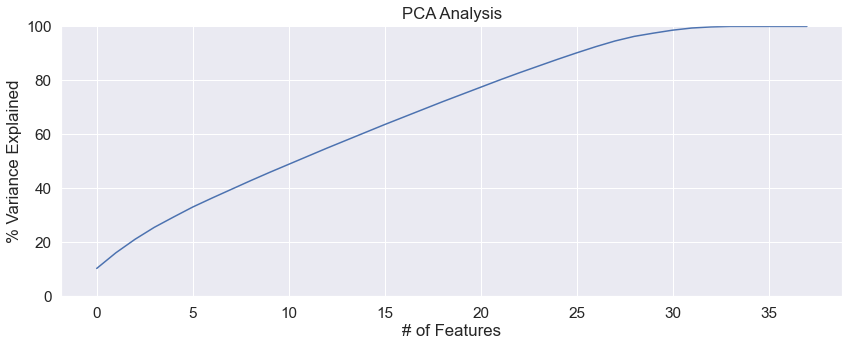

[0.10259017 0.1609083  0.21093923 0.25475728 0.29321046 0.33000484
 0.36335642 0.39584995 0.42743244 0.45859226 0.48893057 0.51879953
 0.54850386 0.57767214 0.60653591 0.63528095 0.66351117 0.69166581
 0.71949445 0.74693641 0.77430077 0.80102165 0.82698312 0.85213818
 0.87706188 0.90121761 0.92400695 0.944721   0.96197872 0.97416517
 0.98508175 0.99323127 0.99760059 1.         1.         1.
 1.         1.        ]


In [39]:
#apply PCA
pca = PCA(n_components = None)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

#print the explained variance
fig, ax = plt.subplots(figsize = (14,5))
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.savefig("Explained Variance PCA")
plt.show()
print(pca.explained_variance_ratio_.cumsum())


We can see that with 32 principal components we can describe more than 99% of the variance of the dataset. We proceed by selecting them in order to decrease the cardinality of the data without loosing too much information.

In [40]:
#apply PCA
pca = PCA(n_components = 32)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Model Selection
### Perceptron

In [41]:
multi_accuracy = make_scorer(accuracy_score)

params_ppn = {"clf__penalty": ["l2", "l1", "elasticnet"],\
             "clf__alpha": [0.0001, 0.0002, 0.0005],\
             "clf__max_iter" : [1000, 1400],\
             "clf__shuffle": (True, False),\
             "clf__random_state": [42],\
             "clf__warm_start" : (True,False),\
             "clf__n_jobs" : [-1]}
estimator_ppn = Pipeline([("sampling", SMOTE()), ("clf", Perceptron())])
clf = GridSearchCV(scoring = multi_accuracy , estimator = estimator_ppn, param_grid =  params_ppn)
clf.fit(X_train, y_train)
print(f"The best paramaters founded are : \n {clf.best_params_} \nwith a best score : {clf.best_score_}")

The best paramaters founded are : 
 {'clf__alpha': 0.0002, 'clf__max_iter': 1400, 'clf__n_jobs': -1, 'clf__penalty': 'l1', 'clf__random_state': 42, 'clf__shuffle': True, 'clf__warm_start': False} 
with a best score : 0.7617781231940768


The Accuracy score for the Perceptron is 0.7484901218139011
The Recall score for the Perceptron is 0.8519650655021834
The F1 score for the Perceptron is 0.6136184934738167
The Precision score for the Perceptron is 0.47947898746620793


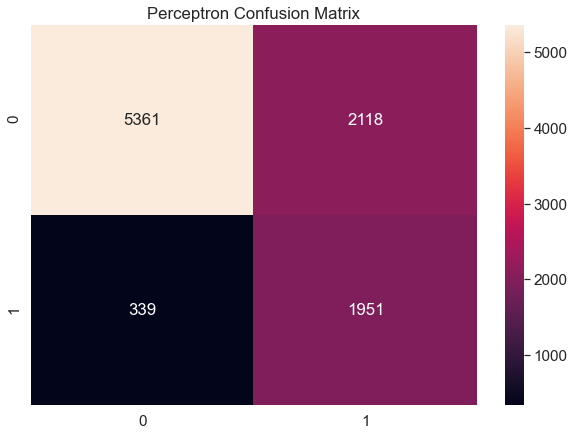

In [42]:
y_pred = clf.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"The Accuracy score for the Perceptron is {accuracy_score(y_test, y_pred)}")
print(f"The Recall score for the Perceptron is {recall_score(y_test, y_pred)}")
print(f"The F1 score for the Perceptron is {f1_score(y_test, y_pred)}")
print(f"The Precision score for the Perceptron is {precision_score(y_test, y_pred)}")


plt.figure(figsize = (10,7))
plt.title('Perceptron Confusion Matrix')
sns.heatmap(conf_mat, annot=True, fmt = "g")
plt.savefig('Perceptron Confusion Matrix')
plt.show()

### Linear Support Vector Machines

In [44]:
params_svc = {"clf__C" : [1,1.5],\
             "clf__kernel" : ["linear","sigmoid","rbf"],\
             "clf__degree" : [2],\
             "clf__gamma" : ["scale", "auto"],\
             "clf__random_state" : [42]}
estimator_svc = Pipeline([("sampling", SMOTE()), ("clf", SVC())])
clf = GridSearchCV(scoring = multi_accuracy , estimator = estimator_svc, param_grid =  params_svc, n_jobs = -1)
clf.fit(X_train, y_train)
print(f"The best paramaters founded are : \n {clf.best_params_} \nwith a best score : {clf.best_score_}")

The best paramaters founded are : 
 {'clf__C': 1, 'clf__degree': 2, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'clf__random_state': 42} 
with a best score : 0.7989403765507093


The Accuracy score for the Support Vector Machines is 0.8013102671716654
The Recall score for the Support Vector Machines is 0.856768558951965
The F1 score for the Support Vector Machines is 0.6690537084398976
The Precision score for the Support Vector Machines is 0.5488111888111888


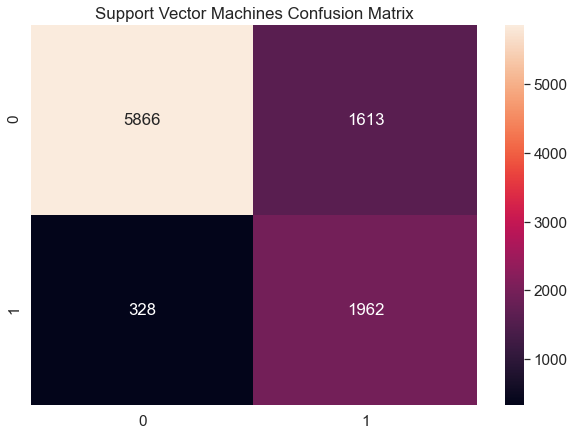

In [45]:
y_pred = clf.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"The Accuracy score for the Support Vector Machines is {accuracy_score(y_test, y_pred)}")
print(f"The Recall score for the Support Vector Machines is {recall_score(y_test, y_pred)}")
print(f"The F1 score for the Support Vector Machines is {f1_score(y_test, y_pred)}")
print(f"The Precision score for the Support Vector Machines is {precision_score(y_test, y_pred)}")


plt.figure(figsize = (10,7))
plt.title('Support Vector Machines Confusion Matrix')
sns.heatmap(conf_mat, annot=True, fmt = "g")
plt.savefig('Support Vector Machines Confusion Matrix')

plt.show()

### Logistic Regression

In [47]:
params_lr = {"clf__penalty" : ["l1","l2","elasticnet","none"],\
             "clf__C" : [1,1.5],\
             "clf__random_state" : [42],\
             "clf__solver" : ["liblinear", "lbfgs", "sag", "saga"]}
estimator_lr = Pipeline([("sampling", SMOTE()), ("clf", LogisticRegression())])
clf = GridSearchCV(scoring = multi_accuracy , estimator = estimator_lr, param_grid =  params_lr, n_jobs = -1)
clf.fit(X_train, y_train)
print(f"The best paramaters founded are : \n {clf.best_params_} \nwith a best score : {clf.best_score_}")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


70 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penal

The best paramaters founded are : 
 {'clf__C': 1.5, 'clf__penalty': 'l2', 'clf__random_state': 42, 'clf__solver': 'lbfgs'} 
with a best score : 0.7959458039206824


The Accuracy score for the Logistic Regression is 0.8011055379260927
The Recall score for the Logistic Regression is 0.8314410480349345
The F1 score for the Logistic Regression is 0.6621457137889063
The Precision score for the Logistic Regression is 0.5501300202253684


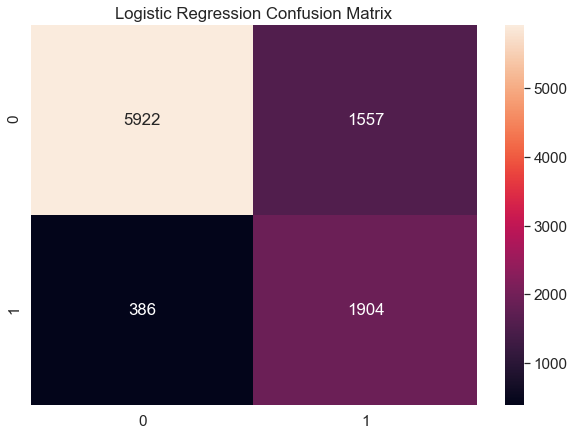

In [48]:
y_pred = clf.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"The Accuracy score for the Logistic Regression is {accuracy_score(y_test, y_pred)}")
print(f"The Recall score for the Logistic Regression is {recall_score(y_test, y_pred)}")
print(f"The F1 score for the Logistic Regression is {f1_score(y_test, y_pred)}")
print(f"The Precision score for the Logistic Regression is {precision_score(y_test, y_pred)}")


plt.figure(figsize = (10,7))
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(conf_mat, annot=True, fmt = "g")
plt.savefig('Logistic Regression Confusion Matrix')

plt.show()

### Random Forest

In [50]:
params_rf = {"clf__n_estimators" : [100, 200],\
             "clf__criterion" : ["gini","entropy", "log_loss"],\
             "clf__min_samples_split" : [2,3],\
             "clf__max_features" : ["sqrt","log2"],\
             "clf__random_state" : [42]}
estimator_rf= Pipeline([("sampling", SMOTE()), ("clf", RandomForestClassifier())])
clf = GridSearchCV(scoring = multi_accuracy , estimator = estimator_rf, param_grid =  params_rf, n_jobs = -1)
clf.fit(X_train, y_train)
print(f"The best paramaters founded are : \n {clf.best_params_} \nwith a best score : {clf.best_score_}")

The best paramaters founded are : 
 {'clf__criterion': 'gini', 'clf__max_features': 'sqrt', 'clf__min_samples_split': 3, 'clf__n_estimators': 200, 'clf__random_state': 42} 
with a best score : 0.8280909783299855


The Accuracy score for the Random Forest is 0.8292558091923431
The Recall score for the Random Forest is 0.7148471615720524
The F1 score for the Random Forest is 0.6624848239579118
The Precision score for the Random Forest is 0.6172699849170438


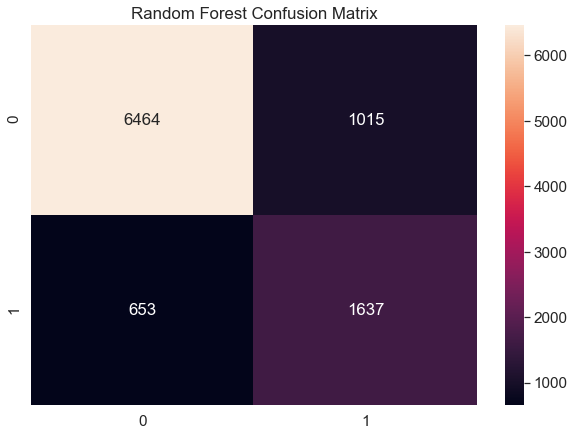

In [51]:
y_pred = clf.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"The Accuracy score for the Random Forest is {accuracy_score(y_test, y_pred)}")
print(f"The Recall score for the Random Forest is {recall_score(y_test, y_pred)}")
print(f"The F1 score for the Random Forest is {f1_score(y_test, y_pred)}")
print(f"The Precision score for the Random Forest is {precision_score(y_test, y_pred)}")


plt.figure(figsize = (10,7))
plt.title('Random Forest Confusion Matrix')
sns.heatmap(conf_mat, annot=True, fmt = "g")
plt.savefig('Random Forest Confusion Matrix')

plt.show()

### K-Nearest Neighbors

In [53]:
params_knn = {"clf__n_neighbors" : [4, 5, 6],\
             "clf__weights" : ["uniform","distance"],\
             "clf__algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],\
             "clf__p" : [1,2],\
             "clf__n_jobs" : [-1]}
estimator_knn= Pipeline([("sampling", SMOTE()), ("clf", KNeighborsClassifier())])
clf = GridSearchCV(scoring = multi_accuracy , estimator = estimator_knn, param_grid =  params_knn, n_jobs = -1)
clf.fit(X_train, y_train)
print(f"The best paramaters founded are : \n {clf.best_params_} \nwith a best score : {clf.best_score_}")


The best paramaters founded are : 
 {'clf__algorithm': 'ball_tree', 'clf__n_jobs': -1, 'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'uniform'} 
with a best score : 0.8022417430466275
The accuracy of the KNN Model is 0.8368307912785341


The Accuracy score for the K Nearest Neighbors is 0.8038693827413246
The Recall score for the K Nearest Neighbors is 0.6842794759825328
The F1 score for the K Nearest Neighbors is 0.6205940594059407
The Precision score for the K Nearest Neighbors is 0.5677536231884058


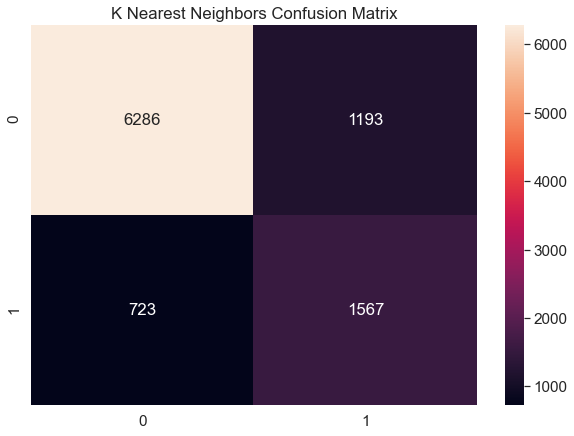

In [54]:
y_pred = clf.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"The Accuracy score for the K Nearest Neighbors is {accuracy_score(y_test, y_pred)}")
print(f"The Recall score for the K Nearest Neighbors is {recall_score(y_test, y_pred)}")
print(f"The F1 score for the K Nearest Neighbors is {f1_score(y_test, y_pred)}")
print(f"The Precision score for the K Nearest Neighbors is {precision_score(y_test, y_pred)}")


plt.figure(figsize = (10,7))
plt.title('K Nearest Neighbors Confusion Matrix')
sns.heatmap(conf_mat, annot=True, fmt = "g")
plt.savefig('K Nearest Neighbors Confusion Matrix')

plt.show()